In [ ]:
import pandas as pd
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_edt_indo.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_platform.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_startup.csv')
df4 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_revolusi.csv')
df5 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_edtech_industri.csv')
df6 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_aplikasi4.csv')
df7 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_app2.csv')
df8 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_aplikasibhs.csv')
df9 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_website.csv')
df10 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_websitebhs2.csv')
df11 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_platform_bljr.csv')
df12 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_platform_bhs1.csv')

In [ ]:
data = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12], ignore_index=True)
data

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1662039772087599109,Fri May 26 10:15:35 +0000 2023,1711,From 1 206 companies valued over $1B in the wo...,1662039772087599109,NaN,NaN,en,"Bandung, Indonesia",61,57,370,https://twitter.com/gibranhuzaifah/status/1662...,351930241,gibranhuzaifah
1,1686593116558766080,Wed Aug 02 04:21:49 +0000 2023,12,Blessed to have the opportunity to share once ...,1686593116558766080,https://pbs.twimg.com/ext_tw_video_thumb/16865...,NaN,en,NaN,0,0,0,https://twitter.com/alvinsmiclat/status/168659...,1675117447555481600,alvinsmiclat
2,1383430498312101895,Sat Apr 17 14:41:48 +0000 2021,10,This is a drone that delivers books to Indones...,1383430498312101895,https://pbs.twimg.com/ext_tw_video_thumb/11029...,NaN,en,"Seattle, WA",0,0,9,https://twitter.com/2morrowknight/status/13834...,19478383,2morrowknight
3,1784779162345144735,Mon Apr 29 02:58:06 +0000 2024,2,Refocus an edtech company operating in the Phi...,1784779162345144735,NaN,NaN,en,Thailand,0,0,0,https://twitter.com/techzico/status/1784779162...,1720348793206697984,techzico
4,1330767570719313922,Mon Nov 23 06:58:07 +0000 2020,7,Edtech contenders in Indonesia. Worth noting t...,1330767570719313922,https://pbs.twimg.com/media/EnfV3Z_UYAEC-W9.jpg,NaN,en,Jakarta,0,1,0,https://twitter.com/faizrahmaaan/status/133076...,362278573,faizrahmaaan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026,1541231097576845313,Mon Jun 27 04:33:01 +0000 2022,2,@sbmptnfess kalo kamu udah ada ilmunya dikit m...,1541278403747540993,NaN,sbmptnfess,in,she/her,0,1,0,https://twitter.com/muichurross/status/1541278...,965082170015465472,muichurross
1027,1572609462732718081,Thu Sep 22 01:59:21 +0000 2022,12,@RiaVertika1 @rdtoddladksgek @mojijimooya @Fem...,1572767477511376896,NaN,RiaVertika1,in,living in 310821,0,1,0,https://twitter.com/wonwoosby/status/157276747...,1167426862345154560,wonwoosby
1028,1785496907068158088,Thu May 02 08:19:54 +0000 2024,0,@Yellowlime02 @rnizzzs @convomfs Kalo mau akse...,1785947307919425569,NaN,Yellowlime02,in,NaN,0,2,0,https://twitter.com/mrthomasbrain/status/17859...,1634768679580868609,mrthomasbrain
1029,1355085258333413382,Fri Jan 29 09:27:56 +0000 2021,0,-moa ayo kita belajar bahasa inggris coba terj...,1355085258333413382,NaN,NaN,en,kirim menfess? 👉,0,33,0,https://twitter.com/moanamenfess/status/135508...,1283841890295574528,moanamenfess


In [ ]:
df = data[['created_at', 'full_text']]
df

,created_at,full_text
0,Fri May 26 10:15:35 +0000 2023,From 1 206 companies valued over $1B in the wo...
1,Wed Aug 02 04:21:49 +0000 2023,Blessed to have the opportunity to share once ...
2,Sat Apr 17 14:41:48 +0000 2021,This is a drone that delivers books to Indones...
3,Mon Apr 29 02:58:06 +0000 2024,Refocus an edtech company operating in the Phi...
4,Mon Nov 23 06:58:07 +0000 2020,Edtech contenders in Indonesia. Worth noting t...
...,...,...
1026,Mon Jun 27 04:33:01 +0000 2022,@sbmptnfess kalo kamu udah ada ilmunya dikit m...
1027,Thu Sep 22 01:59:21 +0000 2022,@RiaVertika1 @rdtoddladksgek @mojijimooya @Fem...
1028,Thu May 02 08:19:54 +0000 2024,@Yellowlime02 @rnizzzs @convomfs Kalo mau akse...
1029,Fri Jan 29 09:27:56 +0000 2021,-moa ayo kita belajar bahasa inggris coba terj...


## Preprocessing Data

In [ ]:
# Function to remove links from text
def remove_links(text):
    return re.sub(r'http\S+', '', text)

# Function to remove tags from text
def remove_tags(text):
    return re.sub(r'<.*?>', '', text)

# Function to remove non-alphabetic characters from text
def remove_non_alphabetic(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)

# Preprocess the text column
df['full_text'] = df['full_text'].apply(remove_links)
df['full_text'] = df['full_text'].apply(remove_tags)
df['full_text'] = df['full_text'].apply(remove_non_alphabetic)

df.head()

<ipython-input-5-2b7cf2af2b6c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['full_text'] = df['full_text'].apply(remove_links)
<ipython-input-5-2b7cf2af2b6c>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['full_text'] = df['full_text'].apply(remove_tags)
<ipython-input-5-2b7cf2af2b6c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

,created_at,full_text
0,Fri May 26 10:15:35 +0000 2023,From companies valued over B in the world c...
1,Wed Aug 02 04:21:49 +0000 2023,Blessed to have the opportunity to share once ...
2,Sat Apr 17 14:41:48 +0000 2021,This is a drone that delivers books to Indones...
3,Mon Apr 29 02:58:06 +0000 2024,Refocus an edtech company operating in the Phi...
4,Mon Nov 23 06:58:07 +0000 2020,Edtech contenders in Indonesia Worth noting th...


In [ ]:
# Baca file stopwords-id.txt
with open('/content/drive/MyDrive/Colab Notebooks/stopwords-id.txt', 'r', encoding='utf-8') as f:
    stop_words = set(f.read().splitlines())

more_stop_words = {
    'ngga','deh','utk','D','tuh','gw','nak','nya','nih','bgt','lu','ga','btw','ya','yaa','kaya','M','dlm','dll','gt','jg',
    'jd','u','dr','worksfess','gue','guys','ni','udh','gak','kak','tau','sih','klo','udah','tau','org','B','tp','pas','cm',
    'kalo','convomf','dgn','aja','yg','nggak','X','M','kali','n','bener','amp','D','DM','yt','pake','dah','convomfs','banget',
    'Halo','dapet','eng','biar','taik','kakak','sampe'
}

stop_words.update(more_stop_words)

# Fungsi untuk menghapus stop words
def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)

# Hapus stop words dari kolom "full_text"
df['full_text'] = df['full_text'].apply(remove_stopwords)

df.head()

<ipython-input-33-11efffea6bce>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['full_text'] = df['full_text'].apply(remove_stopwords)


,created_at,full_text
0,Fri May 26 10:15:35 +0000 2023,From companies valued over B in the world comp...
1,Wed Aug 02 04:21:49 +0000 2023,Blessed to have the opportunity to share once ...
2,Sat Apr 17 14:41:48 +0000 2021,This is a drone that delivers books to Indones...
3,Mon Apr 29 02:58:06 +0000 2024,Refocus an edtech company operating in the Phi...
4,Mon Nov 23 06:58:07 +0000 2020,Edtech contenders in Indonesia Worth noting th...


In [ ]:
df.to_csv("/content/drive/MyDrive/Colab Notebooks/Analisis Sentimen EdTech Industry/preprocessed_dataset.csv", index=False)

In [ ]:
import pandas as pd
from textblob import TextBlob

# Load the data from the CSV file
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Analisis Sentimen EdTech Industry/preprocessed_dataset.csv")

# Function to determine sentiment and label
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity < 0:
        return "Negative"
    else:
        return "Neutral"

# Add a new column for sentiment labels
dataset["Sentiment"] = dataset["full_text"].apply(get_sentiment)

# Save the labeled data to a new CSV file
dataset.to_csv("/content/drive/MyDrive/Colab Notebooks/Analisis Sentimen EdTech Industry/labeled_dataset.csv", index=False)

print("Sentiment labeling completed. Labeled data saved to labeled_dataset.csv.")

Sentiment labeling completed. Labeled data saved to labeled_dataset.csv.


In [ ]:
labeled_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Analisis Sentimen EdTech Industry/labeled_dataset.csv")

# Count the occurrences of each sentiment label
sentiment_counts = labeled_data["Sentiment"].value_counts()

print("Sentiment distribution:")
print(sentiment_counts)

Sentiment distribution:
Sentiment
Neutral     818
Positive    165
Negative     48
Name: count, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertModel

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
!pip install transformers

## Data Preparation

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

def load_and_split_data(file_path, test_size=0.2, shuffle=True):
    df = pd.read_csv(file_path)
    train_data, test_data = train_test_split(df, test_size=test_size, shuffle=shuffle)
    return train_data, test_data

# Example usage:
file_path = '/content/drive/MyDrive/Colab Notebooks/Analisis Sentimen EdTech Industry/labeled_dataset.csv'
train_data, test_data = load_and_split_data(file_path, test_size=0.2, shuffle=True)
train_data.head(5)

,created_at,full_text,Sentiment
291,Fri Aug 11 13:16:16 +0000 2023,konseptual edtech layanan sesuai dgn kemampuan...,Neutral
208,Tue Feb 27 12:20:40 +0000 2024,Inovasi terbaru MI Syamsul Huda smart kartu ES...,Positive
888,Wed May 08 06:03:37 +0000 2024,gt Surat khabar gt Radio gt TV gt Facebook gt ...,Neutral
460,Mon Apr 29 23:37:04 +0000 2024,Kl lawannya benua suporter yg aplikasi sebelah...,Neutral
980,Fri May 21 07:43:55 +0000 2021,belajar bahasa Inggris darimana platform fasil...,Neutral


## Unique Emotions

In [ ]:
le = LabelEncoder()
train_data.loc[:, 'Sentiment'] = le.fit_transform(train_data['Sentiment'])
test_data.loc[:, 'Sentiment'] = le.transform(test_data['Sentiment'])

## Emotion Dataset

In [ ]:
class EmotionDataset(Dataset):
    def __init__(self, df, tokenizer, max_len):
        self.df = df.reset_index(drop=True)  # Reset the index to ensure sequential values
        self.tokenizer = tokenizer
        self.max_len = max_len
    def __len__(self):
        return len(self.df)
    def __getitem__(self, index):
        essay = str(self.df.loc[index, 'full_text'])
        emotion = self.df.loc[index, 'Sentiment']
        encoding = self.tokenizer.encode_plus(
            essay,
            add_special_tokens=True,
            truncation=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt',
        )
        return {
            'full_text': essay,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'Sentiment': torch.tensor(emotion, dtype=torch.long)
        }

## Tokenizer

In [ ]:
# create an instance of the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
# set the batch size
batch_size = 8

# set the maximum sequence length
max_len = 150

# create data loaders for the training and validation sets
train_dataset = EmotionDataset(train_data, tokenizer, max_len)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = EmotionDataset(test_data, tokenizer, max_len)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

## Model

In [ ]:
import torch.nn as nn
from transformers import BertModel

class BertSentimentClassifier(nn.Module):
    def __init__(self, bert_model_name, num_classes):
        super(BertSentimentClassifier, self).__init__()

        self.bert = BertModel.from_pretrained(bert_model_name)
        self.fc1 = nn.Linear(self.bert.config.hidden_size, 64)
        self.dropout = nn.Dropout(0.2)
        self.fc2 = nn.Linear(64, num_classes)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        pooled_output = self.dropout(pooled_output)  # Apply dropout once
        output = self.fc1(pooled_output)
        logits = self.fc2(output)

        return logits

In [ ]:
bert_model_name = "bert-base-cased"
num_classes = train_data["Sentiment"].nunique()
model = BertSentimentClassifier(bert_model_name, num_classes)

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

In [ ]:
criterion = nn.CrossEntropyLoss()

## Training

In [ ]:
def train(model, data_loader, optimizer, criterion, device):
    model.train()
    total_loss, total_accuracy = 0, 0
    for data in tqdm(data_loader):
        input_ids = data['input_ids'].to(device)
        attention_mask = data['attention_mask'].to(device)
        labels = data['Sentiment'].to(device)

        optimizer.zero_grad()

        outputs = model(input_ids, attention_mask)

        loss = criterion(outputs, labels)
        total_loss += loss.item()

        logits = outputs.detach().cpu().numpy()
        label_ids = labels.to('cpu').numpy()

        total_accuracy += flat_accuracy(logits, label_ids)

        loss.backward()
        optimizer.step()

    # calculate the average loss
    avg_loss = total_loss / len(data_loader)
    avg_acc = total_accuracy / len(data_loader)


    return avg_loss, avg_acc

In [ ]:
def evaluate(model, data_loader, criterion, device):
    # set the model to eval mode
    model.eval()

    # initialize the loss and accuracy variables
    total_loss = 0
    total_accuracy = 0

    # iterate over the data loader
    for data in tqdm(data_loader):
        # move the inputs to the device
        input_ids = data['input_ids'].to(device)
        attention_mask = data['attention_mask'].to(device)
        labels = data['Sentiment'].to(device)

        # disable gradient computation
        with torch.no_grad():
            # get the model's predictions
            outputs = model(input_ids, attention_mask)

            # get the loss
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            # calculate the number of correct predictions
            logits = outputs.detach().cpu().numpy()
            label_ids = labels.to('cpu').numpy()

            total_accuracy += flat_accuracy(logits, label_ids)

    # calculate the average loss and accuracy
    avg_loss = total_loss / len(data_loader)
    accuracy = total_accuracy / len(data_loader)

    return avg_loss, accuracy

In [ ]:
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

Epoch 1


100%|██████████| 26/26 [00:01<00:00, 13.56it/s]


Train Loss: 0.6594 | Train Acc: 0.7536 | Val Loss: 0.5185 | Val Acc: 0.8139
Epoch 2


100%|██████████| 26/26 [00:01<00:00, 13.33it/s]


Train Loss: 0.4694 | Train Acc: 0.8216 | Val Loss: 0.3936 | Val Acc: 0.8537
Epoch 3


100%|██████████| 26/26 [00:01<00:00, 13.49it/s]


Train Loss: 0.3275 | Train Acc: 0.8920 | Val Loss: 0.3707 | Val Acc: 0.8832
Epoch 4


100%|██████████| 26/26 [00:02<00:00, 12.87it/s]


Train Loss: 0.2482 | Train Acc: 0.9163 | Val Loss: 0.3766 | Val Acc: 0.8688
Epoch 5


100%|██████████| 26/26 [00:01<00:00, 13.05it/s]


Train Loss: 0.1422 | Train Acc: 0.9612 | Val Loss: 0.3788 | Val Acc: 0.8880


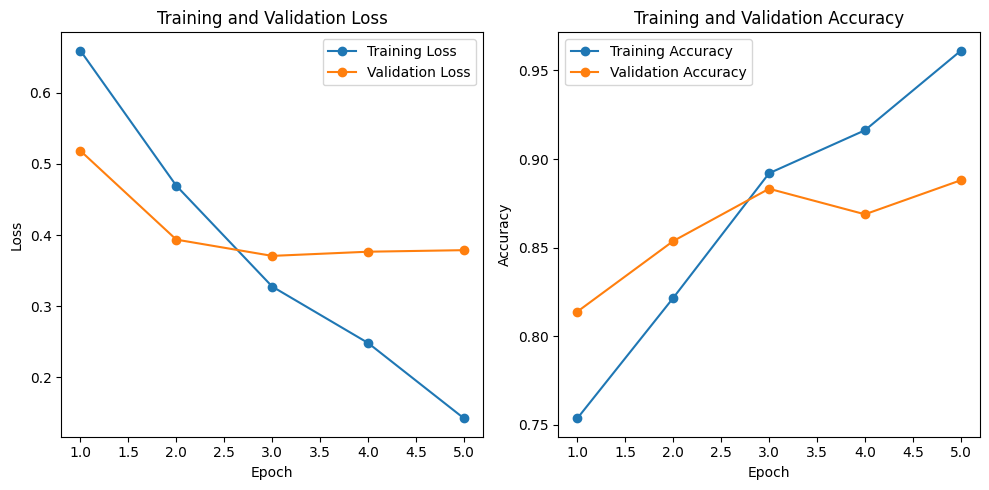

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

lr = 2e-5
num_epochs = 5
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

model.to(device)

train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    print(f'Epoch {epoch + 1}')
    train_loss, train_acc = train(model, train_loader, optimizer, criterion, device)
    val_loss, val_acc = evaluate(model, val_loader, criterion, device)

    print(f'Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}')

    # Save the loss and accuracy values
    train_accuracies.append(train_acc)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

# Plotting
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(10, 5))

# Plotting Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Training Loss', marker='o')
plt.plot(epochs, val_losses, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracies, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Visualisasi

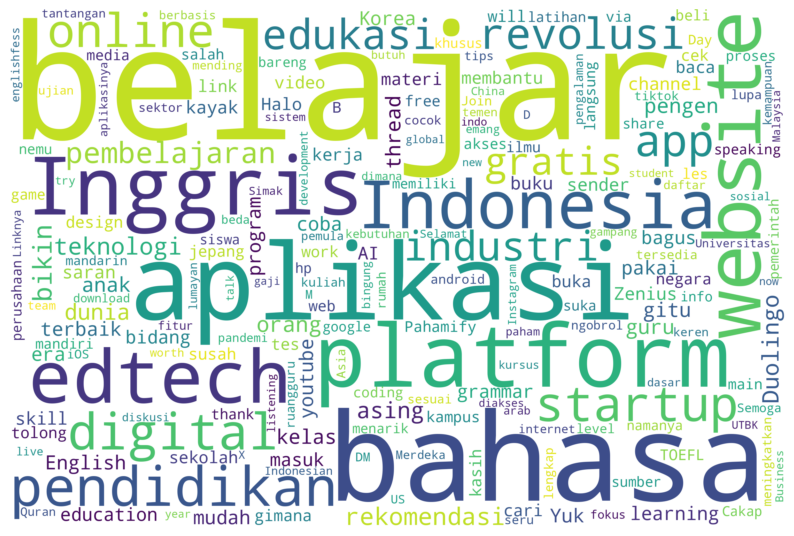

In [ ]:
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

all_words = ' '.join([tweets for tweets in df['full_text']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='White',
    collocations=False,
    stopwords=STOPWORDS
).generate(all_words)

plot_cloud(wordcloud)

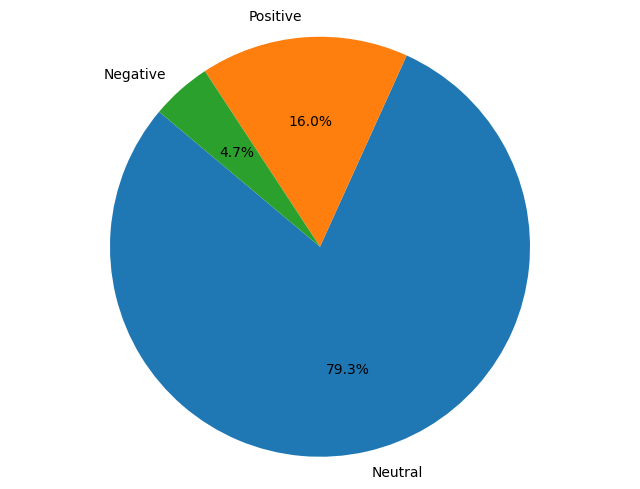

In [ ]:
# Hitung jumlah tweet berdasarkan sentimen
sentiment_counts = dataset['Sentiment'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()